In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
import random
import seaborn as sns

In [6]:
g = RandGraph(graph_type='simple')

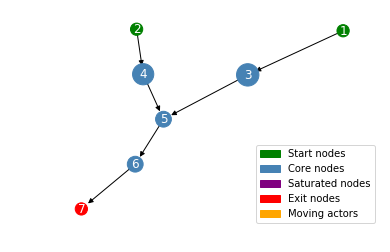

In [7]:
g.plot()

In [8]:
g.graph.edges(data=True)

OutEdgeDataView([(1, 3, {'pass_through': 2}), (2, 4, {'pass_through': 2}), (3, 5, {'pass_through': 2}), (4, 5, {'pass_through': 2}), (5, 6, {'pass_through': 2}), (6, 7, {'pass_through': 2})])

In [32]:
# rand edge
edge = random.sample(g.graph.edges(),1)[0]
val = np.random.rand()
# change pass_through
g.change_pass_through(edge, val)

In [33]:
g.graph.edges(data=True)

OutEdgeDataView([(1, 3, {'pass_through': 2}), (2, 4, {'pass_through': 2}), (3, 5, {'pass_through': 2}), (4, 5, {'pass_through': 2}), (5, 6, {'pass_through': 2}), (6, 7, {'pass_through': 2})])

In [34]:
h = RandGraph()

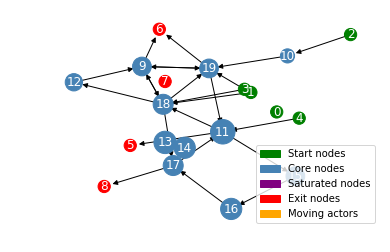

In [35]:
h.plot()

In [36]:
h.graph.edges(data=True)

OutEdgeDataView([(1, 18, {'pass_through': 2}), (2, 10, {'pass_through': 5}), (3, 18, {'pass_through': 6}), (3, 19, {'pass_through': 1}), (4, 11, {'pass_through': 6}), (9, 18, {'pass_through': 4}), (9, 19, {'pass_through': 4}), (9, 6, {'pass_through': 5}), (10, 19, {'pass_through': 9}), (11, 18, {'pass_through': 2}), (11, 5, {'pass_through': 6}), (11, 15, {'pass_through': 5}), (12, 9, {'pass_through': 2}), (15, 16, {'pass_through': 7}), (16, 17, {'pass_through': 7}), (17, 8, {'pass_through': 2}), (17, 11, {'pass_through': 7}), (18, 9, {'pass_through': 10}), (18, 19, {'pass_through': 10}), (18, 12, {'pass_through': 8}), (18, 17, {'pass_through': 1}), (19, 11, {'pass_through': 7}), (19, 9, {'pass_through': 8}), (19, 19, {'pass_through': 4}), (19, 6, {'pass_through': 3})])

In [37]:
# rand edge
edge = random.sample(h.graph.edges(),1)[0]
val = np.random.rand()
# change pass_through
h.change_pass_through(edge, val)

In [66]:
h.graph.edges(data=True)

OutEdgeDataView([(1, 18, {'pass_through': 2}), (2, 10, {'pass_through': 5}), (3, 18, {'pass_through': 6}), (3, 19, {'pass_through': 1}), (4, 11, {'pass_through': 6}), (9, 18, {'pass_through': 4}), (9, 19, {'pass_through': 4}), (9, 6, {'pass_through': 5}), (10, 19, {'pass_through': 9}), (11, 18, {'pass_through': 2}), (11, 5, {'pass_through': 6}), (11, 15, {'pass_through': 5}), (12, 9, {'pass_through': 2}), (15, 16, {'pass_through': 7}), (16, 17, {'pass_through': 7}), (17, 8, {'pass_through': 2}), (17, 11, {'pass_through': 7}), (18, 9, {'pass_through': 10}), (18, 19, {'pass_through': 10}), (18, 12, {'pass_through': 8}), (18, 17, {'pass_through': 1}), (19, 11, {'pass_through': 6.8899331908040224}), (19, 9, {'pass_through': 7.8742093609188828}), (19, 19, {'pass_through': 3.9371046804594414}), (19, 6, {'pass_through': 3.8962583034529619})])

Not all intersections are eligible for a `passing_through` update. We can define the action space as the set of outgoing edges from nodes with outgoing degree greater than 1.

In [51]:
nodes = [l[0] for l in h.graph.out_degree() if l[1]>1]

In [57]:
action_space = list(h.graph.edges(nodes))

In [58]:
action_space

[(3, 18),
 (3, 19),
 (9, 18),
 (9, 19),
 (9, 6),
 (11, 18),
 (11, 5),
 (11, 15),
 (17, 8),
 (17, 11),
 (18, 9),
 (18, 19),
 (18, 12),
 (18, 17),
 (19, 11),
 (19, 9),
 (19, 19),
 (19, 6)]

From the list of `moving_actors` we select only the number of actors in `prev_node` equals to `pass_through` from the (`prev_node`,`possible_node`) edge.

In [75]:
pt_vals = {edge: 1 for i,edge in enumerate(action_space)}

In [76]:
pt_vals[(3,18)]

1

In [90]:
pt_vals = {}
for i,edge in enumerate(action_space):
    pt_vals[edge] = np.round(0.73)

In [91]:
pt_vals

{(3, 18): 1.0,
 (3, 19): 1.0,
 (9, 6): 1.0,
 (9, 18): 1.0,
 (9, 19): 1.0,
 (11, 5): 1.0,
 (11, 15): 1.0,
 (11, 18): 1.0,
 (17, 8): 1.0,
 (17, 11): 1.0,
 (18, 9): 1.0,
 (18, 12): 1.0,
 (18, 17): 1.0,
 (18, 19): 1.0,
 (19, 6): 1.0,
 (19, 9): 1.0,
 (19, 11): 1.0,
 (19, 19): 1.0}

In [87]:
pt_vals[(18,12)]

1

In [113]:
g = RandGraph()

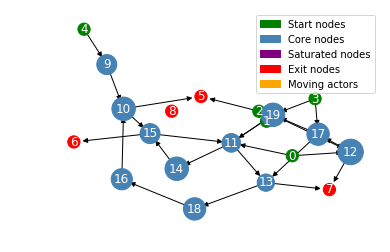

In [114]:
g.plot()

In [115]:
g.graph.edges(data=True)

OutEdgeDataView([(0, 11, {'pass_through': 6}), (0, 12, {'pass_through': 3}), (3, 17, {'pass_through': 10}), (3, 19, {'pass_through': 4}), (4, 9, {'pass_through': 9}), (9, 10, {'pass_through': 5}), (10, 5, {'pass_through': 6}), (10, 15, {'pass_through': 10}), (11, 19, {'pass_through': 10}), (11, 13, {'pass_through': 5}), (11, 14, {'pass_through': 3}), (12, 17, {'pass_through': 8}), (12, 7, {'pass_through': 5}), (13, 18, {'pass_through': 2}), (13, 7, {'pass_through': 7}), (14, 14, {'pass_through': 9}), (14, 15, {'pass_through': 4}), (15, 11, {'pass_through': 3}), (15, 6, {'pass_through': 4}), (16, 10, {'pass_through': 5}), (17, 17, {'pass_through': 10}), (17, 19, {'pass_through': 2}), (17, 13, {'pass_through': 7}), (18, 16, {'pass_through': 10}), (19, 11, {'pass_through': 1}), (19, 12, {'pass_through': 5}), (19, 5, {'pass_through': 6})])

In [121]:
g.action(4,0.5)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)

In [122]:
g.graph.edges(data=True)

OutEdgeDataView([(0, 11, {'pass_through': 6}), (0, 12, {'pass_through': 3}), (3, 17, {'pass_through': 10}), (3, 19, {'pass_through': 4}), (4, 9, {'pass_through': 9}), (9, 10, {'pass_through': 5}), (10, 5, {'pass_through': 9.5}), (10, 15, {'pass_through': 7.0}), (11, 19, {'pass_through': 10}), (11, 13, {'pass_through': 5}), (11, 14, {'pass_through': 3}), (12, 17, {'pass_through': 8}), (12, 7, {'pass_through': 5}), (13, 18, {'pass_through': 2}), (13, 7, {'pass_through': 7}), (14, 14, {'pass_through': 9}), (14, 15, {'pass_through': 4}), (15, 11, {'pass_through': 3}), (15, 6, {'pass_through': 4}), (16, 10, {'pass_through': 5}), (17, 17, {'pass_through': 10}), (17, 19, {'pass_through': 2}), (17, 13, {'pass_through': 7}), (18, 16, {'pass_through': 10}), (19, 11, {'pass_through': 1}), (19, 12, {'pass_through': 5}), (19, 5, {'pass_through': 6})])

In [123]:
g.graph.nodes(data=True)

NodeDataView({0: {'actors': None}, 1: {'actors': None}, 2: {'actors': None}, 3: {'actors': None}, 4: {'actors': [b'7ba341e4']}, 5: {'actors': None}, 6: {'actors': None}, 7: {'actors': None}, 8: {'actors': None}, 9: {'actors': None, 'capacity': 5}, 10: {'actors': None, 'capacity': 8}, 11: {'actors': None, 'capacity': 4}, 12: {'actors': None, 'capacity': 10}, 13: {'actors': None, 'capacity': 3}, 14: {'actors': None, 'capacity': 8}, 15: {'actors': None, 'capacity': 5}, 16: {'actors': None, 'capacity': 6}, 17: {'actors': None, 'capacity': 7}, 18: {'actors': None, 'capacity': 7}, 19: {'actors': None, 'capacity': 8}})

In [163]:
g = RandGraph(actors=10000)
act_space = len(g.controllable_intersections)
congestion = []
total_reward = []
for i in range(100):
    action = random.choice(range(act_space))
    val = 0.0
    congest, reward = g.action(action, val)
    congestion.append(congest)
    total_reward.append(reward)

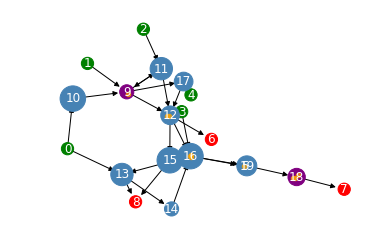

In [164]:
g.plot(legend=False)

In [143]:
g.graph.edges(data=True)

OutEdgeDataView([(0, 10, {'pass_through': 6}), (1, 9, {'pass_through': 7.6610066971186743}), (1, 12, {'pass_through': 2.3280124319792046}), (1, 15, {'pass_through': 3.5264650212370121}), (2, 9, {'pass_through': 5}), (9, 19, {'pass_through': 11.736718652875004}), (9, 12, {'pass_through': 9.978136831884628}), (9, 15, {'pass_through': 2.0977935405785835}), (10, 6, {'pass_through': 1.3301768727387175}), (10, 14, {'pass_through': 5.0944153562020755}), (10, 15, {'pass_through': 1.4529058837962041}), (12, 16, {'pass_through': 11.573954436131977}), (12, 17, {'pass_through': 1.731784676609305}), (12, 12, {'pass_through': 1.6465917111602464}), (12, 6, {'pass_through': 2.0476691760984709}), (14, 10, {'pass_through': 8}), (15, 19, {'pass_through': 1.292209368136406}), (15, 12, {'pass_through': 2.0338761492091741}), (15, 5, {'pass_through': 15.231444377319884}), (16, 10, {'pass_through': 5}), (17, 5, {'pass_through': 9}), (19, 9, {'pass_through': 12.552903880908719}), (19, 6, {'pass_through': 1.067

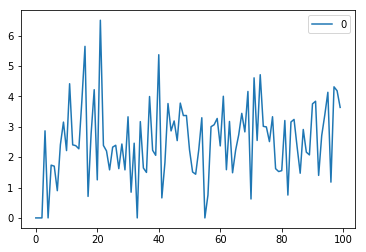

In [165]:
pd.DataFrame(total_reward).plot()
plt.show()

In [166]:
congestion = np.array(congestion)

In [167]:
congestion = congestion.reshape((100,11))

In [168]:
congestion.shape

(100, 11)

In [169]:
congestion[:3,:]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.25      ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.14285714,  0.25      ,  0.        ,
         0.        ,  0.1       ,  0.1       ,  0.        ,  0.        ,
         0.        ]])

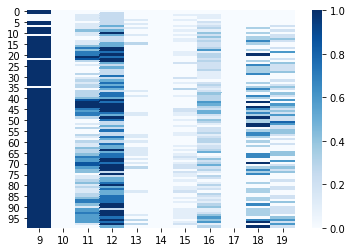

In [170]:
sns.heatmap(pd.DataFrame(congestion, columns=g.core_nodes), cmap='Blues')
plt.show()

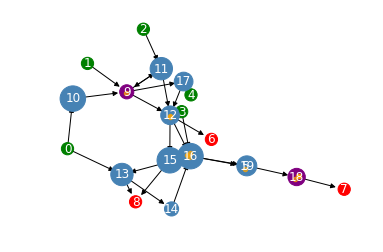

In [171]:
g.plot(legend=False)

In [172]:
np.mean(total_reward)

2.5161839826839825

In [181]:
g = RandGraph(actors=10000)
act_space = len(g.controllable_intersections)
congestion = []
total_reward = []
for i in range(100):
    action = random.choice(range(act_space))
    val = np.random.randn()
    congest, reward = g.action(action, val)
    congestion.append(congest)
    total_reward.append(reward)

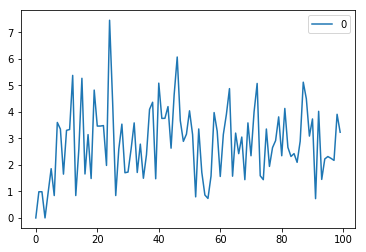

In [182]:
pd.DataFrame(total_reward).plot()
plt.show()

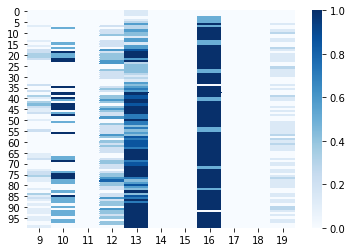

In [183]:
congestion = np.array(congestion)
congestion = congestion.reshape((100,11))
sns.heatmap(pd.DataFrame(congestion, columns=g.core_nodes), cmap='Blues')
plt.show()

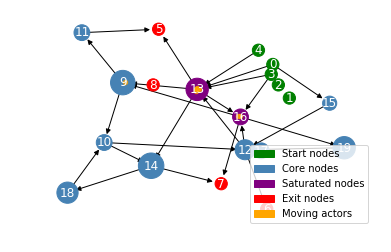

In [184]:
g.plot()